In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
file_path = "Significant Earthquake Dataset 1900-2023.csv"
df = pd.read_csv(file_path)
df.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [4]:
df = df[['Latitude','Longitude','Depth','Mag']]
df = df.dropna()

In [5]:
X = StandardScaler().fit_transform(df)

In [6]:
dbs = DBSCAN(eps=0.1,min_samples=10,metric='euclidean')

In [7]:
df['cluster'] = dbs.fit_predict(X)

In [8]:
df['cluster'].value_counts()

cluster
-1      14480
 0      11655
 5       2049
 2       1636
 19       916
        ...  
 187        7
 210        7
 159        7
 152        5
 156        4
Name: count, Length: 227, dtype: int64

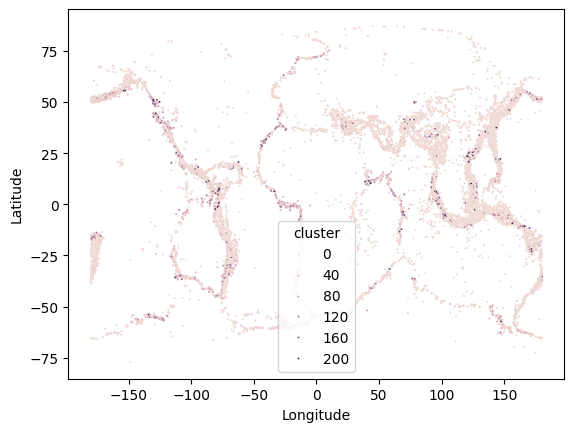

In [9]:
sns.scatterplot(data=df,x='Longitude',y='Latitude',hue='cluster',s=2)
plt.show()